# <font color='purple'>IRIS dataset </font>
***

### Summary of IRIS dataset:
***

The IRIS dataset, created in 1936, is a popular dataset commonly used for exploring data analysis and data visualisation.

The dataset consists of measurements for 3 different species (setosa, versicolor and virginica) of Iris flowers.  
There are 50 entries per species detailed in the dataset.

#### Species:
|Setosa    |Versicolor | Virginica|
|-----------|---------------|------------|
|![Setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg)|![Versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/320px-Iris_versicolor_3.jpg)|![Virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg)|

As the species variable are plain text, the data type string will be applicable here.

Four characteristics of the flowers were tracked including sepal length, sepal width, petal length and petal width.  
These four varaibles are numeric values and looking at the raw data we can see decimal places are present. 
With this, the data type used for this variables will be float.

 

### How to run analysis.py program:
***

### analysis.py code explained: 
***
> enumerate() - Works as a way to loop over objects while also keeping count for the loop.
The added bonus in this case is that it has the possibility to work with dictionaries key-pairs when used with the items() method. 
The enumerate function can take in two arguments the sequence to be used for the loop and optionally the starting value for the loop. If the starting value is not defined it defaults to 0.  
Using indexing enumerate adds the possibility to access key-pair information from a dictionary, this makes it possible to change values in the loop after each iteration.   
In the case of analysis.py file it allows for the variable used to plot the histogram and the filename of the png to be updated after each iteration resulting in much neater code.  

https://www.simplilearn.com/tutorials/python-tutorial/enumerate-in-python
https://www.freecodecamp.org/news/how-to-check-if-a-file-exists-in-python/  
https://www.geeksforgeeks.org/python-check-if-a-file-or-directory-exists/

> items() - Returns a view option that contains key-pair values in from a dictionary.   
For this project it is pulling the variable and png filename to be used with the enumerate function for  the loop. 

https://www.w3schools.com/python/ref_dictionary_items.asp
https://www.geeksforgeeks.org/python-dictionary-items-method/
https://docs.python.org/3/library/stdtypes.html#dictionary-view-objects



### Cloning repo in GitHub:


1. Copy the following URL:  
        https://github.com/Ange-Dvs/pands-project.git

1. Open CMDER or if using VS Code open the terminal pane

1. Go to the folder where you want to clone the repository to on your machine and type git pull.  
        

1. Set merge as the mode for the pull  
        

1. Initiate the pull of the GitHub repository  
        

1. If the pull has been successful you should see 4 files pulled from GitHub
        The .gitignore file, a csv file containing the dataset, the readme in the form of a Jupyter notebook and the analysis.py file which contains the program to run.  
        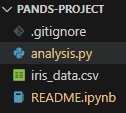

### Running the code on your machine

1. To run the code open CMDER or the terminal in VS Code.
1. Navigate to the folder where the repository is stored.
1. Type  and hit enter. 
1. The python code should run and generate 8 files.
    - modified_iris_data.csv created
    - hist_sepal_length.png created.
    - hist_sepal_width.png created.
    - hist_petal_length.png created.
    - hist_petal_width.png created. 
    - scatter_all_variables.png created. 
    - hist_all_variables_per_species.png created. 
1. If the code has run successfully you will see confirmation printed when each file is created.  
        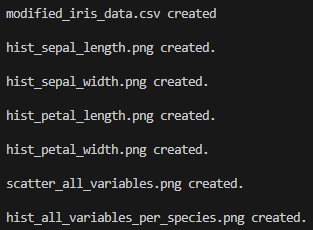
    
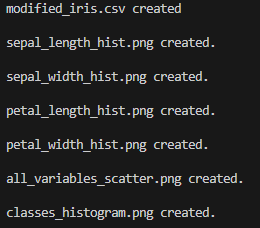

##### Error handling 

Error handling is including in the code to ensure if a file is already existing in the folder with the same filename the user will be informed.

The error messages will look like this:  
    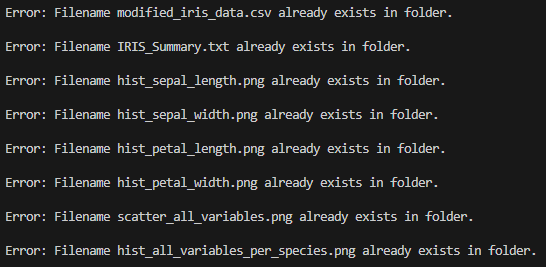

If the error message for a file is returned that file will not be re-created or overwritten.
If you want to rerun the code and create the files again, you'll need to delete the existing file or files first.

### Creating summary file
***

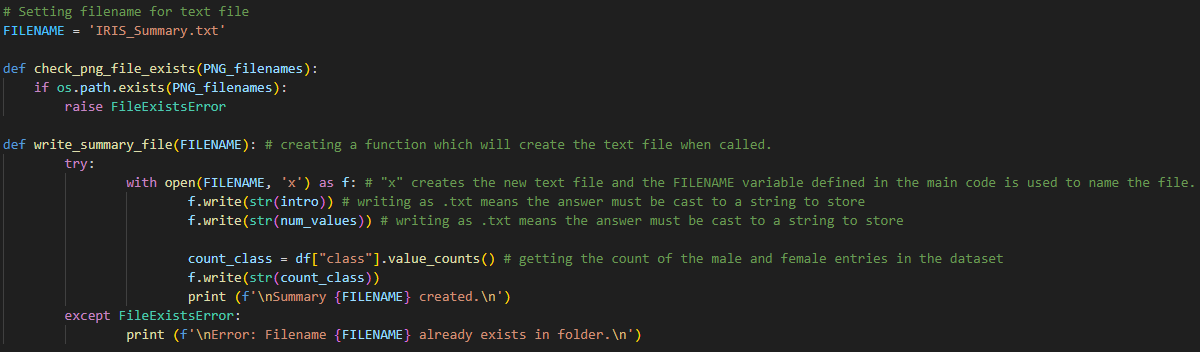

To start off the FILENAME is assigned a string value for use later in the code.


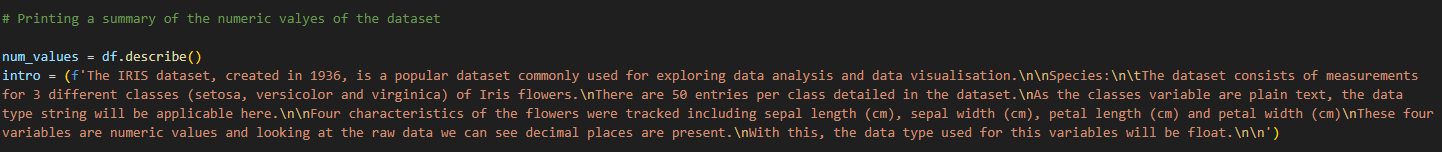



### Creating Histograms
***

Creating the scatter plot
***

#### Libaries used:
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tabulate import tabulate as tb

Creating functions to reuse later:

setting_axis_limits
check_png_file_exists
write_summary_file
create_histograms
scatter_all_variables
set_bins_width

In [2]:
# fetching data from csv file
original_df = pd.read_csv('iris_data.csv')

In [3]:
# Tidying up the dataset so that it is the items printed to the summary file are more readable, i.e. the output of df.describe() would be split due to the length of the column headers
 
# Checking the original df for ' (cm)' and deleting it
original_df.columns = original_df.columns.str.replace(' (cm)', '')

# Saving modified DataFrame back to a new CSV file so that we can use the tidied information for the plots.
original_df.to_csv('modified_iris.csv', index=False)

df = pd.read_csv('modified_iris.csv')

In [4]:
# Filter the dataset based on species to be able to seperate and compare the variables and differientate per species
# setosa, versicolor and virginica

setosa_df = df[df['class'] == 'Iris-setosa']
versicolor_df = df[df['class'] == 'Iris-versicolor']
virginica_df = df[df['class'] == 'Iris-virginica']

In [5]:
# taking a quick look at the data to verify it's loaded
print (df)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [6]:
# Show the different types of values in the data set
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

In [7]:
# Highlevel summary of dataset for the numerical columns 
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
count_class = df['class'].value_counts() # getting the count of the male and female entries in the dataset
print(count_class) # printing the counts

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


code breakdown 

write summary file 


Ideas for what to include for analysis :

- Break down per  variables per class of Iris? maybe too much information and not needed
- Calculated correlation of: each pair of variables in the dataset maybe add then into scatter chart somehow?
- discussion on standard deviation for the histograms. 



### Code for writing file

In [19]:
# Setting filename for text file to be reused later in the code.
FILENAME = 'IRIS_Summary.txt'

# Define lsit of variables to plot for x axis value and y axis value for scatter plot png
x_variables_y_variables = [('',''), ('sepal width', 'sepal length'), ('petal length', 'sepal length'), ('petal width', 'sepal length'), ('sepal length', 'sepal width'), ('',''), ('petal length', 'sepal width'), ('petal width', 'sepal width'), ('sepal length','petal length'), ('sepal width', 'petal length'), ('',''), ('petal width', 'petal length'), ('sepal length', 'petal width'), ('sepal width', 'petal width'), ('petal length','petal width'), ('','')]

def write_summary_file(FILENAME, x_variables_y_variables): # creating a function which will create the text file when called.
        try: # first the new text file is attempted to be created 
                with open(FILENAME, 'x', encoding='utf-8') as f: # "x" creates the new text file and the FILENAME variable defined at the beginning of the main code block is used to name the file.
                        f.write(str(intro)) # writing as .txt means the answer must be cast to a string to store

                        print (f'\nSummary {FILENAME} created.\n') # not to user that the file has been created


                        correlations = {}
                        species_dfs_to_use = {'All classes -': df,'Setosa -': setosa_df, 'Virginica -': virginica_df, 'Versicolor -': versicolor_df}

                        for (species_df_name) in (species_dfs_to_use):
                                for i, (x_variable, y_variable) in enumerate(x_variables_y_variables, start=1):
                                        if i in [2, 3, 4, 7, 8, 12]:
                                                corr_calculated = float(species_dfs_to_use[species_df_name][x_variable].corr(species_dfs_to_use[species_df_name][y_variable]))
                                                name = (f'{species_df_name} {x_variable} vs {y_variable}')
                                                correlations[name] = corr_calculated

                        table = [ # creating a table which will show the calculated correlation coefficient overall for the entire DF then breaking it down per class of Iris too see how the class of Iris effects the correlation coefficient for a pair of variables
                        ['Correlation\ncoefficient','Sepal Width\nvs.    \nSepal Length','Petal Length\nvs.    \nSepal Length','Petal Width\nvs.    \nSepal Length','Petal Length\nvs.    \nSepal Width','Petal Width\nvs.    \nSepal Width','Petal Width\nvs.    \nPetal Length'],
                        ['All classes', correlations['All classes - sepal width vs sepal length'], correlations['All classes - petal length vs sepal length'], correlations['All classes - petal width vs sepal length'], correlations['All classes - petal length vs sepal width'], correlations['All classes - petal width vs sepal width'], correlations['All classes - petal width vs petal length']],
                        ['Setosa', correlations['Setosa - sepal width vs sepal length'], correlations['Setosa - petal length vs sepal length'], correlations['Setosa - petal width vs sepal length'], correlations['Setosa - petal length vs sepal width'], correlations['Setosa - petal width vs sepal width'], correlations['Setosa - petal width vs petal length']],
                        ['Virginica', correlations['Virginica - sepal width vs sepal length'], correlations['Virginica - petal length vs sepal length'], correlations['Virginica - petal width vs sepal length'], correlations['Virginica - petal length vs sepal width'], correlations['Virginica - petal width vs sepal width'], correlations['Virginica - petal width vs petal length']],
                        ['Versicolor', correlations['Versicolor - sepal width vs sepal length'], correlations['Versicolor - petal length vs sepal length'], correlations['Versicolor - petal width vs sepal length'], correlations['Versicolor - petal length vs sepal width'], correlations['Versicolor - petal width vs sepal width'], correlations['Versicolor - petal width vs petal length']]
                        ]

                        table_to_print = tb(table, headers='firstrow', tablefmt='fancy_grid')
                        
                        f.write(f'\nCorrelation per pair of variables:\n')
                        f.write(table_to_print)

        except FileExistsError: # if the file exists when it is attempted to use "x" to create the file then a FileExistsError is thrown
                print (f'\nError: Filename {FILENAME} already exists in folder.\n') # This message will be printed to the user if the FileExistsError is triggered  

# Printing a summary of the numeric valyes of the dataset
setosa_info = setosa_df.describe()
versicolor_info = versicolor_df.describe()
virginica_info = virginica_df.describe()
num_values = df.describe()
length_df = len(df) # checking the number of entries in the dataset
data_types = df.dtypes
count_class = df['class'].value_counts() # getting the count of the entries in the dataset per class of Iris
intro = (f'\t\t\t\t\t\t**** The IRIS dataset ****\n\nCreated in 1936, the Iris dataset is a popular dataset commonly used for exploring data analysis and data visualisation.\n\nThe dataset consists of measurements for 3 different classes (Setosa, Versicolor and Virginica) of Iris flowers. The number of rows in the dataset is {length_df}, meaning the we have the information for 150 Iris flowers tracked. To see how many entries are tracked per class of Iris we can use the value_count method.\n\n\t{count_class}.\n\nFrom the above we can see there are 50 entries per class detailed in the dataset, so each class accounts for a third of the entries in the dataset. As the classes variable are plain text, the data type string will be applicable here.\n\nFour characteristics of the flowers were tracked including sepal length, sepal width, petal length and petal width. These four variables are numeric values and looking at the raw data we can see decimal places are present. With this, the data type used for this variables will be float. We can check this easily using pandas in python.\n\nVariable:\t\tData type:\n{data_types}\n\nFrom the above we can see that the data type for the numerical variables is in fact a float. For the class variable we can see object is stated. Within pandas the object data type is the most general data type and can hold any Python objects including strings.\n\nNext we will generate some statistical information which will be analysed in the README.ipynb in further details.\n\nNumerical summary looking only of all classes together:\n{num_values}\n\nNumerical summary looking only at the Setosa class:\n{setosa_info}\n\nNumerical summary looking only at the Versicolor class:\n{versicolor_info}\n\nNumerical summary looking only at the Virginica class:\n{virginica_info}\n')

print(intro)
write_summary_file(FILENAME, x_variables_y_variables)

						**** The IRIS dataset ****

Created in 1936, the Iris dataset is a popular dataset commonly used for exploring data analysis and data visualisation.

The dataset consists of measurements for 3 different classes (Setosa, Versicolor and Virginica) of Iris flowers. The number of rows in the dataset is 150, meaning the we have the information for 150 Iris flowers tracked. To see how many entries are tracked per class of Iris we can use the value_count method.

	class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64.

From the above we can see there are 50 entries per class detailed in the dataset, so each class accounts for a third of the entries in the dataset. As the classes variable are plain text, the data type string will be applicable here.

Four characteristics of the flowers were tracked including sepal length, sepal width, petal length and petal width. These four variables are numeric values and looking at the raw data we can see de

In [10]:

correlations = []

for i, (x_variable, y_variable) in enumerate(x_variables_y_variables, start=1):
        if i not in [1, 6, 11, 16]:
                corr_calculated = df[x_variable].corr(df[y_variable])
                print(f'{x_variable}_{y_variable}: {corr_calculated}')
                correlations.append(corr_calculated)

table = [
['','Sepal Width\nvs.    \nSepal Length','Petal Length\nvs.    \nSepal Length','Petal Width\nvs.    \nSepal Length','Petal Length\nvs.    \nSepal Width','Petal Width\nvs.    \nSepal Width','Petal Width\nvs.    \nPetal Length'],
['Correlation\ncoefficient', correlations[0], correlations[1], correlations[2], correlations[4], correlations[5], correlations[8]],
['Correlation\ncoefficient per species', correlations[0], correlations[1], correlations[2], correlations[4], correlations[5], correlations[8]],
]
tb(table, headers='firstrow', tablefmt='fancy_grid')

sepal width_sepal length: -0.10936924995064935
petal length_sepal length: 0.8717541573048714
petal width_sepal length: 0.8179536333691634
sepal length_sepal width: -0.10936924995064935
petal length_sepal width: -0.4205160964011546
petal width_sepal width: -0.35654408961380574
sepal length_petal length: 0.8717541573048714
sepal width_petal length: -0.4205160964011546
petal width_petal length: 0.9627570970509662
sepal length_petal width: 0.8179536333691634
sepal width_petal width: -0.3565440896138058
petal length_petal width: 0.9627570970509662


'╒═════════════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤═══════════════╤════════════════╕\n│                         │    Sepal Width │   Petal Length │    Petal Width │   Petal Length │   Petal Width │    Petal Width │\n│                         │        vs.     │        vs.     │        vs.     │        vs.     │       vs.     │        vs.     │\n│                         │   Sepal Length │   Sepal Length │   Sepal Length │    Sepal Width │   Sepal Width │   Petal Length │\n╞═════════════════════════╪════════════════╪════════════════╪════════════════╪════════════════╪═══════════════╪════════════════╡\n│ Correlation             │      -0.109369 │       0.871754 │       0.817954 │      -0.420516 │     -0.356544 │       0.962757 │\n│ coefficient             │                │                │                │                │               │                │\n├─────────────────────────┼────────────────┼────────────────┼────────────────┼───────────

sepal width vs sl: close to no correlation correlation - very little connection between sw and sl -0.011
petal length vs sl: moderately strong correlation - when one increases the other is likely to increase
petal width vs sl: moderately strong correlation - same as pl vs sl, when one increases the other is likely to increase
pl vs sw: slight negative correlation
pw vs sw: slight negative correlation
pw vs pl: very strong possitive correlation 

2, 3, 4, 7, 8, 12

# Define lsit of variables to plot for x axis value and y axis value for scatter plot png
x_variables_y_variables = [('',''), ('sepal width', 'sepal length'), ('petal length', 'sepal length'), ('petal width', 'sepal length'), ('sepal length', 'sepal width'), ('',''), ('petal length', 'sepal width'), ('petal width', 'sepal width'), ('sepal length','petal length'), ('sepal width', 'petal length'), ('',''), ('petal width', 'petal length'), ('sepal length', 'petal width'), ('sepal width', 'petal width'), ('petal length','petal width'), ('','')]

## Historgrams:

Histogram is not unimodal or symetric. 3 peaks.

### Idea for improvement of scatterplot above:

- Investigate if there is a way to make the variables to plot on x and y axis dynamic like with the histogram function created above using loop and enumerate
- Think about how to handle customization:
    - Use if/elif/else in the loop to decide which custization to use depending on the subplot being plotted
        i.e. if i=1 or 6 or 11 or 14 plot empty subplot so figtext can be added later for the variables 
            elif i=3,7,8,9,10,12 remove x and y ticks
            etc
- If I can get that working need to decide how to structure the main code, do I have functionality to create scatter in a function and use function within a function?

In [11]:

def check_png_file_exists(PNG_filenames): # creating a function which will check if the PNG files are already existing before trying to create them
    if os.path.exists(PNG_filenames): # using OS library the value set in 'PNG_filenames" is used to check if the file is already existing 
        raise FileExistsError # if the file exists the FileExists Error is thrown


def create_histograms(PNG_filenames, variable_to_plot): # creating a function which can be reused to create a histogram of each variable and also to check if the file is already existing
        try: # First this path is attempted to be executed
                check_png_file_exists(PNG_filenames) # the function earlier created to check if the png file exists is triggered. If the file does not exist the code will continue to the next line. If the file does already exist the FileExistsError will be thrown and the code will jump to the except condition.
                plt.figure(figsize=(10,5)) # figure size is set to avoid the plot being overloaded
                plt.subplot(1, 2, 1) # size of subplot is defined with 1 row and 2 columns
                plt.hist(df[variable_to_plot]) # the histogram is created using the value assigned to the variable_to_plot.
                plt.title('All classes of Iris together') # adding the title to the first subplot

                plt.subplot(1, 2, 2) # plotting the subplot to be placed in the second column
                all_sepal_lengths = [setosa_df[variable_to_plot], versicolor_df[variable_to_plot], virginica_df[variable_to_plot]] # using the filtered datasets to select the information per class of Iris to enable colour coding of the histogram per class

                plt.hist(all_sepal_lengths,
                        bins=10, # setting the number of bins
                        stacked=True, # stacked allows us to stack the data into neat columns with the species showing in a towered way 
                        label=['Setosa', 'Versicolor', 'Virginica'], # assigning the labels for the legend
                        edgecolor='white', # setting the colour of the outline of the bins
                        color=['violet', 'navy', 'orange']) # setting the colour of the columns
                plt.title('Colour coded per class of Iris') # adding the title to the second subplot
                plt.yticks([]) # removing y ticks since the same y values are used as shown in the subplot in the first position

                plt.tight_layout() # avoiding any overlap in text or plots in the figure 
                plt.legend() # generating the legend using the labels set

                plt.suptitle(f'Distribution of {variable_to_plot}',  fontsize = 18, y= 1.05) # setting the overall title for the figure
                # Adding a super x label to replace having two separate labels for the x axis
                plt.figtext(0.5, -0.01, f'{variable_to_plot}', ha='center', fontsize=12, fontstyle='italic')

                plt.savefig(PNG_filenames, bbox_inches='tight') # saving scatter plotas PNG file with bbox_inches set to tight to avoid any text or info being cut from the figure
                plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

                print(f'{PNG_filenames} created.\n') # printing the confirmation for a histograms creation 

        except FileExistsError: # If the PNG file is found to already exist when calling check_png_file_exists() function this path is followed
                print(f'Error: Filename {PNG_filenames} already exists in folder. \n') # printing the error that the histogram already exists

# Define dictionary of variables to plot for histograms and filenames for the individual histogram pngs
variables_and_filenames = {
    'sepal length': '1_sepal_length_hist.png',
    'sepal width': '2_sepal_width_hist.png',
    'petal length': '3_petal_length_hist.png',
    'petal width': '4_petal_width_hist.png'}

# Iterate over variables and filenames
for i, (variable_to_plot, PNG_filenames) in enumerate(variables_and_filenames.items()):
       create_histograms(PNG_filenames, variable_to_plot)


1_sepal_length_hist.png created.

2_sepal_width_hist.png created.

3_petal_length_hist.png created.

4_petal_width_hist.png created.



<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Scatter plot code

5_all_variables_scatter.png created.



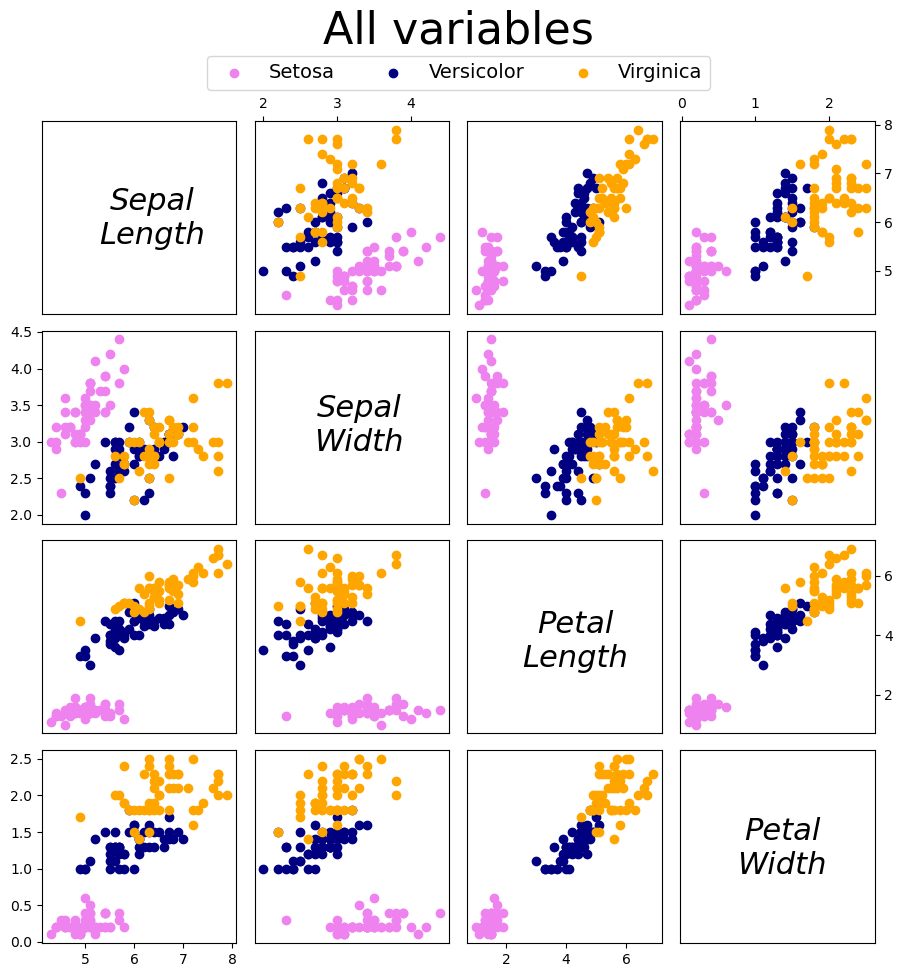

In [12]:
def check_png_file_exists(PNG_filenames): # creating a function which will check if the PNG files are already existing before trying to create them
    if os.path.exists(PNG_filenames): # using OS library the value set in "PNG_filenames" is used to check if the file is already existing 
        raise FileExistsError # if the file exists the FileExists Error is thrown
    

def create_scatter_all_variables(x_variable, y_variable, PNG_filenames):
        if i == 1 or i == 6 or i == 11 or i == 16:
                plt.subplot(4,4,i)
                plt.yticks([])
                plt.xticks([])
                plt.plot()
                if i == 1:
                        plt.figtext(.16, .82, 'Sepal\nLength', ha='center', fontsize=22, fontstyle='italic')
                elif i == 6:
                        plt.figtext(.39, .59, 'Sepal\nWidth', ha='center', fontsize=22, fontstyle='italic')
                elif i == 11:
                        plt.figtext(.63, .35, 'Petal\nLength', ha='center', fontsize=22, fontstyle='italic')
                elif i == 16:
                        plt.figtext(.86, .12, 'Petal\nWidth', ha='center', fontsize=22, fontstyle='italic')
                        plt.tight_layout()
                        plt.suptitle('All variables', y=1.08, fontsize=32)
                        plt.figlegend(loc = 'upper center', ncols = 3, bbox_to_anchor=(0.5, 1.04), fontsize=14, labels=['Setosa', 'Versicolor', 'Virginica']) # creating one legend for the subplots and setting it's location to the top center for the plot. Manually setting the labels to avoid it being set repeatly in the loop
                        plt.savefig(PNG_filenames, bbox_inches='tight') # saving scatter plot as PNG file with bbox_inches set to tight to adjust to fit the whole figure
                        print(f'{PNG_filenames} created.\n') # printing the confirmation for a histograms creation
        else:
                plt.subplot(4,4,i)
                plt.scatter(setosa_df[x_variable], setosa_df[y_variable], color='violet')
                plt.scatter(versicolor_df[x_variable], versicolor_df[y_variable], color='navy')
                plt.scatter(virginica_df[x_variable], virginica_df[y_variable], color='orange')
                if i == 3 or i == 7 or i == 8 or i == 9 or i == 10 or i == 14:
                        plt.yticks([])
                        plt.xticks([])
                elif i == 2:
                        plt.yticks([])
                        plt.tick_params(axis='x', direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
                elif i == 4: 
                        plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)
                        plt.tick_params(axis='x', direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
                elif i == 5:
                        plt.xticks([])
                elif i == 12:
                        plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)
                        plt.xticks([])
                elif i == 15:
                        plt.yticks([])


def setting_axis_limits(): # function to overwrite the range automatically populated for plots and instead use set values for ranges for y axis 
    ymin = 0
    if i == 1:
        ymax = 19.5
    elif i == 2:
        ymax = 16.5
    elif i == 3:
        ymax = 38
    else: 
        ymax = 42
    plt.ylim(ymin, ymax) # setting min and max values for the y axis 


# Define lsit of variables to plot for x axis value and y axis value for scatter plot png
x_variables_y_variables = [('',''), ('sepal width', 'sepal length'), ('petal length', 'sepal length'), ('petal width', 'sepal length'), ('sepal length', 'sepal width'), ('',''), ('petal length', 'sepal width'), ('petal width', 'sepal width'), ('sepal length','petal length'), ('sepal width', 'petal length'), ('',''), ('petal width', 'petal length'), ('sepal length', 'petal width'), ('sepal width', 'petal width'), ('petal length','petal width'), ('','')]

PNG_filenames = '5_all_variables_scatter.png'
# Iterate over variables and filenames
plt.figure(figsize=(9, 9)) # figure size is set to avoid the plot being overloaded
for i, (x_variable, y_variable) in enumerate(x_variables_y_variables, start=1):
        try: 
                check_png_file_exists(PNG_filenames) # the function earlier created to check if the png file exists is triggered. If the file does not exist the code will continue to the next line. If the file does already exist the FileExistsError will be thrown and the code will jump to the except condition.   
                create_scatter_all_variables(x_variable, y_variable, PNG_filenames)   

        except FileExistsError: # If the PNG file is found to already exist when calling check_png_file_exists() function this path is followed
                print(f'Error: Filename {PNG_filenames} already exists in folder.\n') # printing the error that the histogram already exists
                break

Histograms (all)

6_classes_histogram.png created.



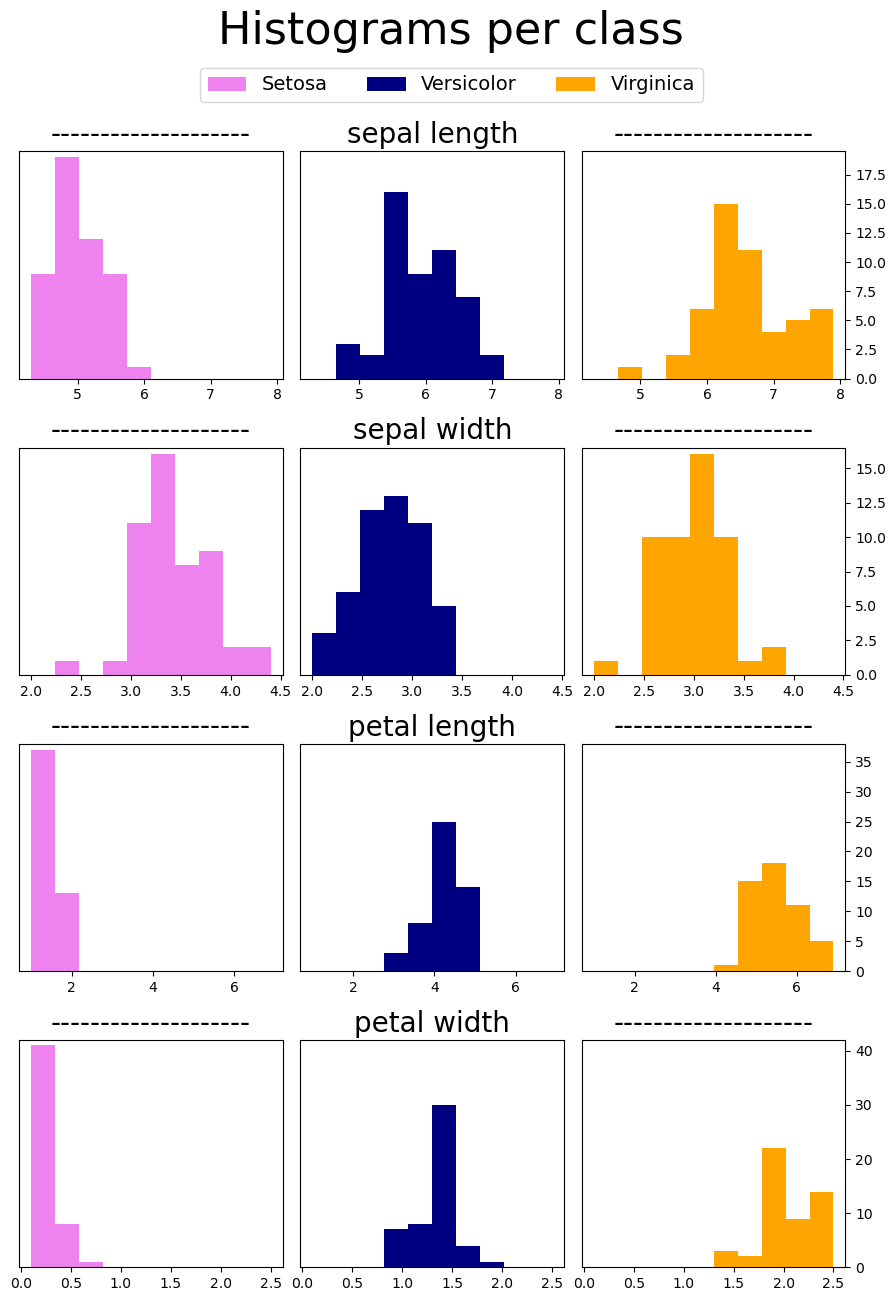

In [13]:
def set_bins_width(variable_to_plot):
        # Compute the bin edges based on the overall range of the variables
        min_width = min(setosa_df[variable_to_plot].min(), versicolor_df[variable_to_plot].min(), virginica_df[variable_to_plot].min())
        max_width = max(setosa_df[variable_to_plot].max(), versicolor_df[variable_to_plot].max(), virginica_df[variable_to_plot].max())
        bin_edges = np.linspace(min_width, max_width, 11)  # 10 bins with equal width
        return bin_edges

def create_histogram_per_classes(s, variable_to_plot, PNG_filenames):
        bin_edges = set_bins_width(variable_to_plot)
        plt.subplot(4, 3, s)  # Creating a subplot for sepal length vs sepal width
        setting_axis_limits()
        plt.hist(setosa_df[variable_to_plot], bins=bin_edges, color='violet')
        plt.yticks([])
        plt.title('--------------------', fontsize = 20)

        plt.subplot(4, 3, s+1)  # Creating a subplot for sepal length vs sepal width
        setting_axis_limits()
        plt.hist(versicolor_df[variable_to_plot], bins=bin_edges, color='navy')
        plt.yticks([])
        plt.title(variable_to_plot, fontsize = 20)
        
        plt.subplot(4, 3, s+2)  # Creating a subplot for sepal length vs petal width  
        setting_axis_limits()
        plt.hist(virginica_df[variable_to_plot], bins=bin_edges, color='orange')
        plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)
        plt.title('--------------------', fontsize = 20)
        if s+2 == 12:
                plt.tight_layout()
                plt.suptitle('Histograms per class', y=1.08, fontsize=32)
                plt.figlegend(loc = 'upper center', ncols = 3, bbox_to_anchor=(0.5, 1.04), fontsize=14, labels=['Setosa', 'Versicolor', 'Virginica']) # creating one legend for the subplots and setting it's location to the top center for the plot
                plt.savefig(PNG_filenames, bbox_inches='tight') # saving scatter plot as PNG file with bbox_inches set to tight to adjust the title
                print(f'{PNG_filenames} created.\n') # printing the confirmation for a histograms creation

s=1
PNG_filenames = '6_classes_histogram.png'
plt.figure(figsize=(9, 12)) # figure size is set to avoid the plot being overloaded
for i, (variable_to_plot) in enumerate(variables_and_filenames, start=1):
        try:
                check_png_file_exists(PNG_filenames) # the function earlier created to check if the png file exists is triggered. If the file does not exist the code will continue to the next line. If the file does already exist the FileExistsError will be thrown and the code will jump to the except condition.
                create_histogram_per_classes(s, variable_to_plot, PNG_filenames)
                s += 3
                
        except FileExistsError: # If the PNG file is found to already exist when calling check_png_file_exists() function this path is followed
                print(f'Error: Filename {PNG_filenames} already exists in folder.\n') # printing the error that the histogram already exists
                break

In [14]:

correlations = {}
species_dfs_to_use = {'All classes -': df,'Setosa -': setosa_df, 'Virginica -': virginica_df, 'Versicolor -': versicolor_df}

# Define lsit of variables to plot for x axis value and y axis value for scatter plot png
x_variables_y_variables = [('',''), ('sepal width', 'sepal length'), ('petal length', 'sepal length'), ('petal width', 'sepal length'), ('sepal length', 'sepal width'), ('',''), ('petal length', 'sepal width'), ('petal width', 'sepal width'), ('sepal length','petal length'), ('sepal width', 'petal length'), ('',''), ('petal width', 'petal length'), ('sepal length', 'petal width'), ('sepal width', 'petal width'), ('petal length','petal width'), ('','')]

for (species_df_name) in (species_dfs_to_use):
    for i, (x_variable, y_variable) in enumerate(x_variables_y_variables, start=1):
        if i in [2, 3, 4, 7, 8, 12]:
            corr_calculated = float(species_dfs_to_use[species_df_name][x_variable].corr(species_dfs_to_use[species_df_name][y_variable]))
            name = (f'{species_df_name} {x_variable} vs {y_variable}')
            correlations[name] = corr_calculated

table = [
['Correlation\ncoefficient','Sepal Width\nvs.    \nSepal Length','Petal Length\nvs.    \nSepal Length','Petal Width\nvs.    \nSepal Length','Petal Length\nvs.    \nSepal Width','Petal Width\nvs.    \nSepal Width','Petal Width\nvs.    \nPetal Length'],
['All classes', correlations['All classes - sepal width vs sepal length'], correlations['All classes - petal length vs sepal length'], correlations['All classes - petal width vs sepal length'], correlations['All classes - petal length vs sepal width'], correlations['All classes - petal width vs sepal width'], correlations['All classes - petal width vs petal length']],

['Setosa', correlations['Setosa - sepal width vs sepal length'], correlations['Setosa - petal length vs sepal length'], correlations['Setosa - petal width vs sepal length'], correlations['Setosa - petal length vs sepal width'], correlations['Setosa - petal width vs sepal width'], correlations['Setosa - petal width vs petal length']],

['Virginica', correlations['Virginica - sepal width vs sepal length'], correlations['Virginica - petal length vs sepal length'], correlations['Virginica - petal width vs sepal length'], correlations['Virginica - petal length vs sepal width'], correlations['Virginica - petal width vs sepal width'], correlations['Virginica - petal width vs petal length']],

['Versicolor', correlations['Versicolor - sepal width vs sepal length'], correlations['Versicolor - petal length vs sepal length'], correlations['Versicolor - petal width vs sepal length'], correlations['Versicolor - petal length vs sepal width'], correlations['Versicolor - petal width vs sepal width'], correlations['Versicolor - petal width vs petal length']]
]

tb(table, headers='firstrow', tablefmt='fancy_grid')


'╒═══════════════╤════════════════╤════════════════╤════════════════╤════════════════╤═══════════════╤════════════════╕\n│ Correlation   │    Sepal Width │   Petal Length │    Petal Width │   Petal Length │   Petal Width │    Petal Width │\n│ coefficient   │        vs.     │        vs.     │        vs.     │        vs.     │       vs.     │        vs.     │\n│               │   Sepal Length │   Sepal Length │   Sepal Length │    Sepal Width │   Sepal Width │   Petal Length │\n╞═══════════════╪════════════════╪════════════════╪════════════════╪════════════════╪═══════════════╪════════════════╡\n│ All classes   │      -0.109369 │       0.871754 │       0.817954 │      -0.420516 │     -0.356544 │       0.962757 │\n├───────────────┼────────────────┼────────────────┼────────────────┼────────────────┼───────────────┼────────────────┤\n│ Setosa        │       0.74678  │       0.263874 │       0.279092 │       0.176695 │      0.279973 │       0.306308 │\n├───────────────┼────────────────┼─────

In [15]:
setosa_info = setosa_df.describe()
versicolor_info = versicolor_df.describe()
virginica_info = virginica_df.describe()

print(f'\nNumerical summary looking only at the Setosa class:')
print(setosa_info)
print(f'\nNumerical summary looking only at the Versicolor class:')
print(versicolor_info)
print(f'\nNumerical summary looking only at the Virginica class:')
print(virginica_info)


Numerical summary looking only at the Setosa class:
       sepal length  sepal width  petal length  petal width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

Numerical summary looking only at the Versicolor class:
       sepal length  sepal width  petal length  petal width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000    

### Analysis of findings from analysis.py
***

### Additional resources/reading:
***
Adding screenshots to Jupyter notebook
https://medium.com/@yogeshkd/four-ways-to-embed-images-in-your-jupyter-notebook-powered-blog-2d28f6d1b6e6#:~:text=1.,command%20to%20embed%20the%20screenshot.

https://en.wikipedia.org/wiki/Iris_flower_data_set  
https://www.markdownguide.org/hacks/  
https://www.kaggle.com/datasets/uciml/iris  
https://archive.ics.uci.edu/dataset/53/iris  
https://matplotlib.org/2.0.2/api/markers_api.html  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html  
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html  
https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html  
https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/  
https://www.pythoncharts.com/matplotlib/histograms/#:~:text=The%20histogram%20bars%20have%20no,some%20separation%20between%20the%20bar.&text=An%20alternative%20is%20just%20to%20make%20the%20bars%20skinnier%20using%20rwidth%20.  
https://matplotlib.org/stable/users/explain/colors/colors.html  
https://levelup.gitconnected.com/unveiling-the-mysteries-of-the-iris-dataset-a-comprehensive-analysis-and-machine-learning-f5c4f9dbcd6d  
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.clf.html#matplotlib-pyplot-clf   
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.suptitle.html  
https://www.geeksforgeeks.org/matplotlib-pyplot-suptitle-function-in-python/  

Inspiration for format of the scatter plot https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_dataset_scatterplot.svg
     


#### Next actions/To-do list:
- Create all code needed in this notebook first to enable easy checking of batches of code
- Add extra analysis and commentary to accompany the plots in notebook
- ~~Decide if README will be a jupyter notebook or just .md file (Does readme file just get deleted if using Jupyter notebook?)~~

### python file:
- Update python file after piece of code is validated
    - Add code which outputs a summary of each variable to single text file > point to consider: should I add breakdown information per species of the summary? 
    - ~~Add code to create histograms of each variables to png files~~
    - ~~Add code to create s scatter plot of each pair of variables~~

- ~~Create subplot which shows all variables against each other~~

- Create histogram of each variable:
    - ~~Write code first which generates the histograms for each variable~~
    - ~~Point to consider: Would it be interesting to created stacked histogram of the variables showing variables for the different species~~
    - ~~Point to consider: Addition file showing subplot that would have 4 rows, 3 columns in each and show the individual histograms per class~~
    - Refactor code to make the final histogram plots neater.
    
    - ~~Enhance so that histograms are saved to seperate png files~~

- ~~Additional calculations: ~~
    - ~~ Point to consider: Would it be interesting to include the calculations of correlation, standard deviation?~~
    - ~~Brainstorm any other insightful calculations that could be included~~

- ~~Point to consider: Would it be a good idea to include error handling to first see if the file is already created and if so displaying a message to the user like "Filenames already existing in folder, no new files generated."~~

- Spellcheck

### README.md sections:

- Research & summary of dataset
- How to run code
    - Cloning & Pulling GitHub
    - Running on your machine
- Explanation of what code does
- Analysis of own findings (including comparison to findings of published studies or analysis online from others)
- Footnotes & additional reading section
- Spellcheck

***
## End